<a href="https://colab.research.google.com/github/farhan1503001/Generative-Deep-Learning-With-Tensorflow/blob/main/GAN/GAN_Using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**First Generative Adversarial Neural Network**

The GAN model is trained using MNIST dataset

In [ ]:
#Importing models
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

**Utilities**

In [ ]:
#Visualization functions
def visualize_multiple_images(images,ncols=None):
  """
     Function for visualizing fake images
  """
  display.clear_output(wait=False)
  ncols=ncols or len(images)
  nrows=(len(images)-1)//ncols+1
  #Now for handeling grayscale images
  if images.shape[-1]==1:
    images=np.squeeze(images,axis=-1)
  plt.figure(figsize=(ncols,nrows))
  #Now we will visualize image
  for index,image in enumerate(images):
    plt.subplot(nrows,ncols,index+1)
    plt.imshow(image,cmap='binary')
    plt.axis("off")

# Loading Dataset Section

In [ ]:
#Now we will load the training dataset for our operation
(x_train,_),_=keras.datasets.mnist.load_data()
#Now normalizing our mnist dataset
x_train=x_train.astype(np.float32)/255

In [ ]:
#Now we will create our dataset batches
batch_size=128
dataset=tf.data.Dataset.from_tensor_slices(x_train).shuffle(100)
dataset=dataset.batch(batch_size,drop_remainder=True).prefetch(1)

# Model Creation Section

**Generator Models**

The generator takes noise and creates fake images of size (28,28)

In [ ]:
random_normal_distribution=32
#Now we will create generator model
generator=keras.models.Sequential(
    [
     keras.layers.Dense(units=64,activation='selu',input_shape=[random_normal_distribution]),
     keras.layers.Dense(units=128,activation='selu'),
     keras.layers.Dense(units=28*28,activation='sigmoid'),
     keras.layers.Reshape([28,28])
    ]
)

**Noise tester**

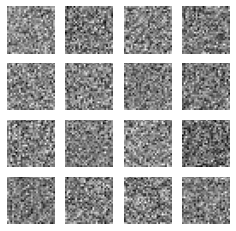

In [ ]:
# generate a batch of noise input (batch size = 16)
test_noise = tf.random.normal([16,random_normal_distribution])

# feed the batch to the untrained generator
test_image = generator(test_noise)

# visualize sample output
visualize_multiple_images(test_image, ncols=4)

# Dicriminator Model

**Now we will create a distributer model which will determine if the image is fake or not**

In [ ]:
discriminator=keras.models.Sequential(
    [
     keras.layers.Flatten(input_shape=[28,28]),
     keras.layers.Dense(units=128, activation='selu'),
     keras.layers.Dense(units=64,activation='selu'),
     keras.layers.Dense(units=1,activation='sigmoid')
    ]
)

In [ ]:
#now define the gan model using discriminator and generator
gan=keras.models.Sequential([generator,discriminator])

**Defining optimizers**

In [ ]:
discriminator.compile(optimizer='rmsprop',loss='binary_crossentropy')
discriminator.trainable=False
gan.compile(optimizer='rmsprop',loss='binary_crossentropy')

#Training GAN

In [ ]:
def train_gan(gan,dataset,random_normal_dimension,epochs=50):
  generator,discriminator=gan.layers
  for epoch in range(epochs):
    print("Epochs {}/{}: ".format(epoch+1,epochs))
    for real_images in dataset:
      #create random noise
      batch_size=real_images.shape[0]
      noise=tf.random.normal(shape=[batch_size,random_normal_dimension])
      #Now create fake images with it
      fake_images=generator(noise)
      #Now create concatenation
      mixed_images=tf.concat([fake_images,real_images],axis=0)
      #Create discriminator labels
      discriminator_labels=tf.constant([[0.]]*batch_size+[[1.]]*batch_size)
      discriminator.trainable=True
      discriminator.train_on_batch(mixed_images,discriminator_labels)
      #Now phase-2 train generator
      noise=tf.random.normal(shape=[batch_size,random_normal_distribution])
      #create fake generator labels
      generator_labels=tf.constant([[1.]]*batch_size)
      discriminator_trainable=False
      gan.train_on_batch(noise,generator_labels)
    visualize_multiple_images(fake_images, 8)                     
    plt.show()  

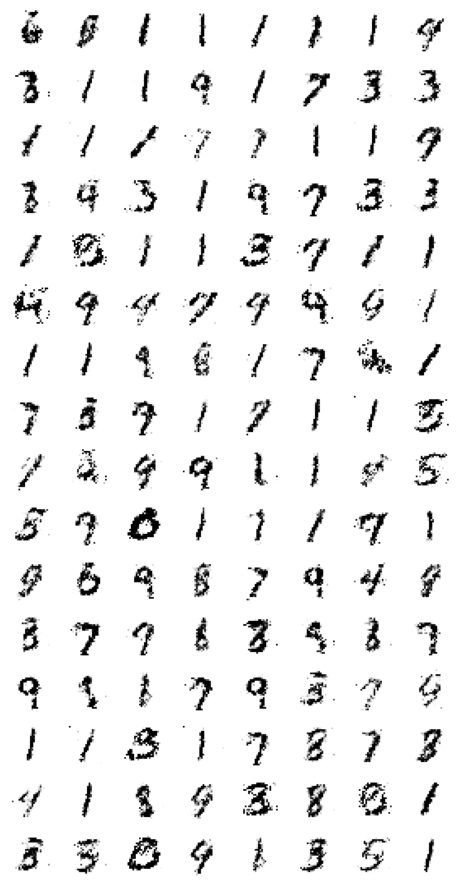

In [ ]:
train_gan(gan, dataset,random_normal_dimension=32, epochs=20)